# Let's Explore VA energy Capabilities over time

In [159]:
#import the libraries that we will use 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [160]:
data = pd.read_csv("va_electricity_capability.csv")
data.head()

,period,stateId,stateDescription,producertypeid,producerTypeDescription,energysourceid,energySourceDescription,capability,capability-units
0,2024,VA,Virginia,EU,Electric Utilities,ALL,All,21256.2,megawatts
1,2024,VA,Virginia,EU,Electric Utilities,BAT,Battery,60.0,megawatts
2,2024,VA,Virginia,EU,Electric Utilities,COL,Coal,1487.1,megawatts
3,2024,VA,Virginia,EU,Electric Utilities,HPS,Pumped Storage,3253.1,megawatts
4,2024,VA,Virginia,EU,Electric Utilities,HYC,Hydroelectric,821.6,megawatts


In [161]:
# Let's clean the data column headers 
new_columns = [col_name.lower().replace('-','') for col_name in data.columns.to_list()]
data.columns = new_columns 
data.head()

,period,stateid,statedescription,producertypeid,producertypedescription,energysourceid,energysourcedescription,capability,capabilityunits
0,2024,VA,Virginia,EU,Electric Utilities,ALL,All,21256.2,megawatts
1,2024,VA,Virginia,EU,Electric Utilities,BAT,Battery,60.0,megawatts
2,2024,VA,Virginia,EU,Electric Utilities,COL,Coal,1487.1,megawatts
3,2024,VA,Virginia,EU,Electric Utilities,HPS,Pumped Storage,3253.1,megawatts
4,2024,VA,Virginia,EU,Electric Utilities,HYC,Hydroelectric,821.6,megawatts


# **---------------------------- High Level Trends ---------------------------**
**Creating a line plot exploring all producers' energy capabilites over time**

In [162]:
# subset the data 
lp_data = data[(data['producertypeid'] == "TOT") & (data['energysourceid'] == "ALL")]
lp_data.head()

,period,stateid,statedescription,producertypeid,producertypedescription,energysourceid,energysourcedescription,capability,capabilityunits
34,2024,VA,Virginia,TOT,All sectors,ALL,All,29146.5,megawatts
86,2023,VA,Virginia,TOT,All sectors,ALL,All,28218.2,megawatts
139,2022,VA,Virginia,TOT,All sectors,ALL,All,29169.2,megawatts
193,2021,VA,Virginia,TOT,All sectors,ALL,All,28515.3,megawatts
245,2020,VA,Virginia,TOT,All sectors,ALL,All,27942.6,megawatts


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


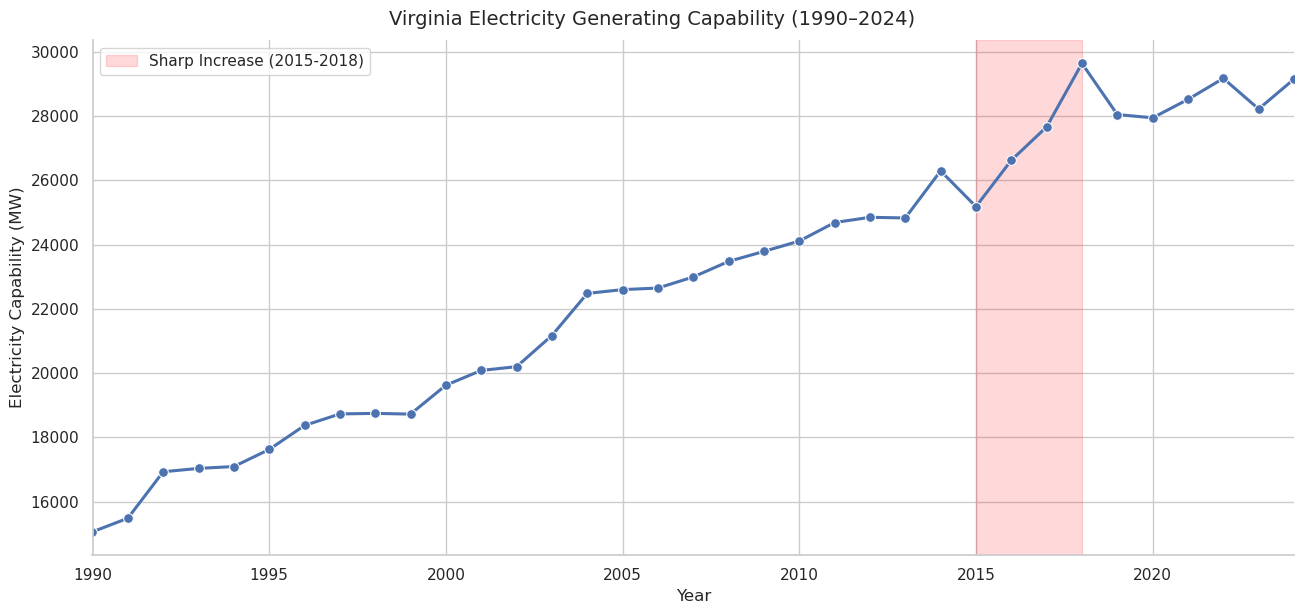

In [163]:
# Set a clean visual style
sns.set_theme(style="whitegrid")

# Create the line plot
g = sns.relplot(data=lp_data, kind="line", x="period", y="capability", height=6, aspect=2.2,linewidth=2.2, marker="o", markersize=7)

# Customize axis labels and title
g.set_axis_labels("Year", "Electricity Capability (MW)")
g.fig.suptitle("Virginia Electricity Generating Capability (1990–2024)",fontsize=14,y=1.02)


highlight_start = 2015
highlight_end = 2018

plt.margins(x = 0)
ax = g.ax
ax.axvspan(highlight_start,highlight_end, alpha=0.15, color="red", label="Sharp Increase (2015-2018)")
ax.legend()

**Now I want to look at the percent change of Electricity Capability**

/tmp/ipykernel_132/1322332136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lp_data["pct_change"] = lp_data["capability"].pct_change() * 100


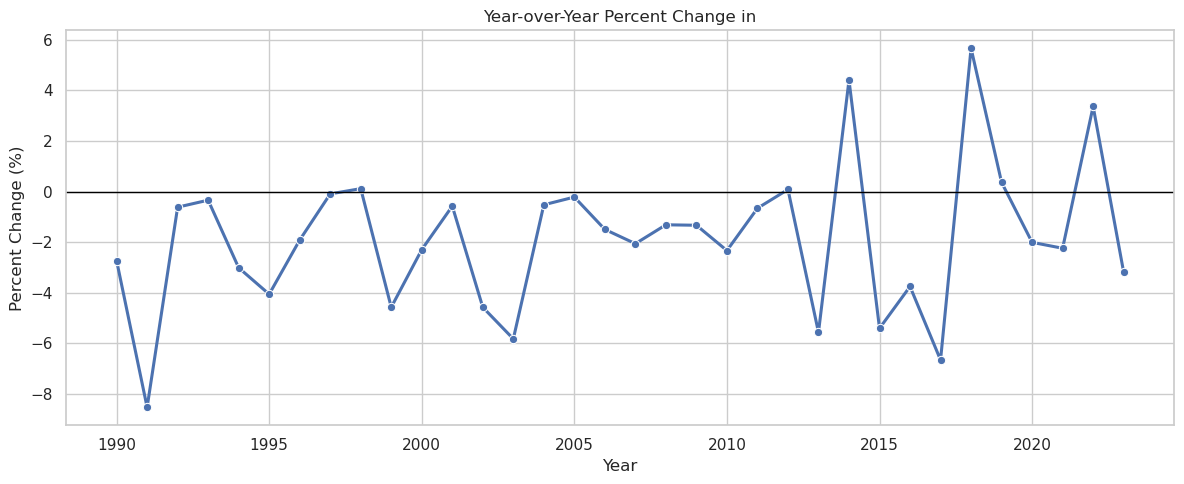

In [164]:
# create percent change column. 
lp_data["pct_change"] = lp_data["capability"].pct_change() * 100

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,5))

sns.lineplot(data=lp_data, x="period", y="pct_change", marker="o", linewidth=2.2,)

plt.axhline(0, color="black", linewidth=1)
plt.title("Year-over-Year Percent Change in")
plt.xlabel("Year")
plt.ylabel("Percent Change (%)")
plt.tight_layout()
plt.show()

**What if I want to look at a stacked area chart.**

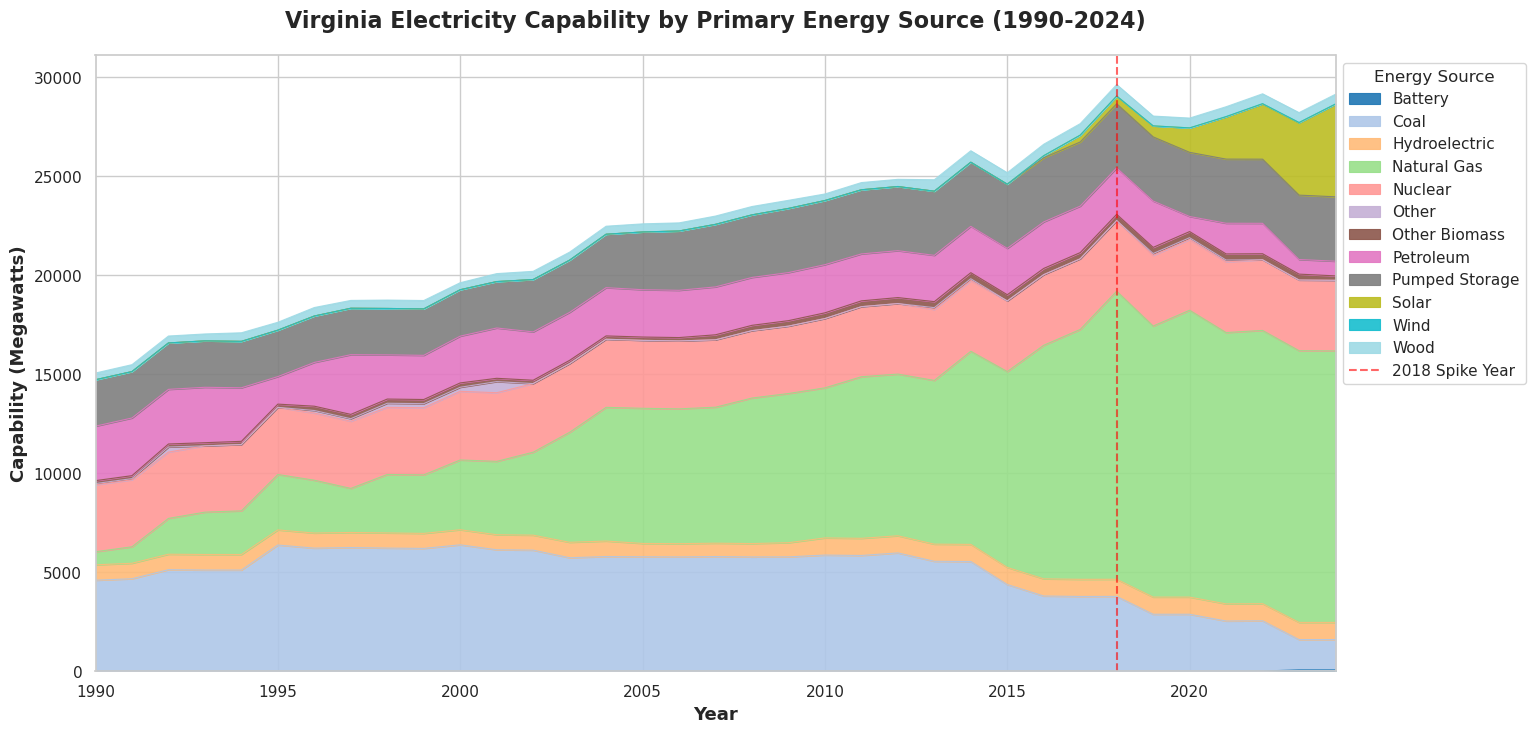

In [165]:
# filter for only the Total producer type 
energy_sources = data[(data['producertypeid'] == "TOT")]
# list of ids we dont want to include
list_of_drops = ['Natural Gas - CC','All','Natural Gas - GT','Natural Gas - IC','Natural Gas - ST','Petroleum - GT', 'Petroleum - IC', 'Solar - PV','Petroleum - ST']
# use query to drop the rows that match the ids 
energy_sources_dropped = energy_sources.query("energysourcedescription not in @list_of_drops")

#make it into wide data for the stacked area plot
energy_pivot = energy_sources_dropped.pivot(index='period', columns='energysourcedescription', values='capability').fillna(0)

fig, ax = plt.subplots(figsize=(16, 8))

energy_pivot.plot(kind='area', stacked=True, ax=ax, cmap='tab20', linewidth=0.8, alpha=0.9)

# Formatting to make it look nice 
ax.margins(x=0)
ax.set_title('Virginia Electricity Capability by Primary Energy Source (1990-2024)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Capability (Megawatts)', fontsize=13, fontweight='bold')
ax.axvline(x=2018, color='red', linestyle='--', linewidth=1.5, alpha=0.6, label='2018 Spike Year')
ax.legend(bbox_to_anchor=(1, 1),title = 'Energy Source')






# **---------------------------- Explore Capability by Energy Source ---------------------------**


**Exploring Natural Gas Capability change over the years**

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


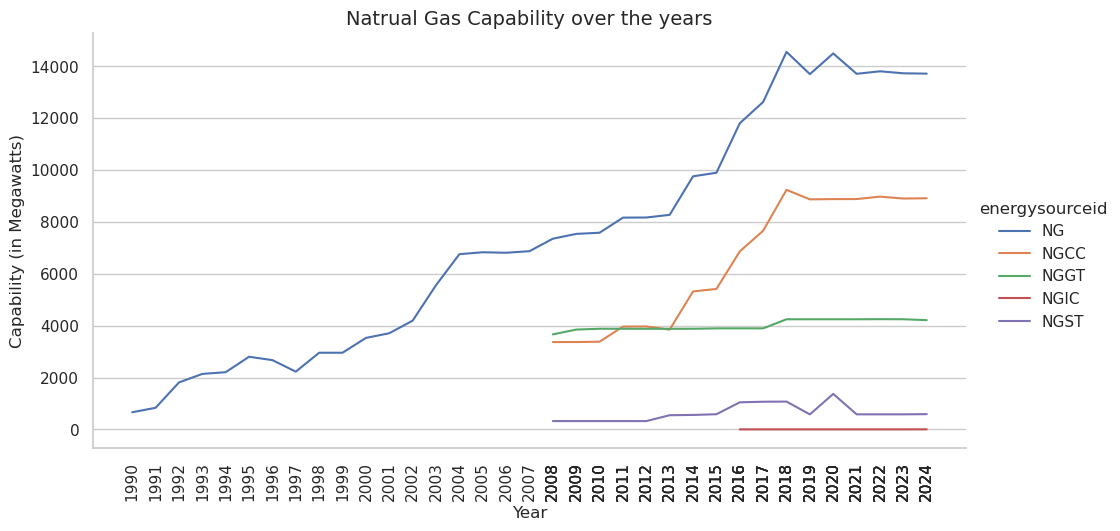

In [144]:
mask = ['NG','NGCC','NGGT','NGIC', 'NGST']
ng_data = data[(data['producertypeid'] == "TOT") & (data['energysourceid'].isin(mask))]

sns.relplot(ng_data, kind='line', x = "period", y = 'capability', hue = "energysourceid", aspect = 2)
plt.title("Natrual Gas Capability over the years", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Capability (in Megawatts)")
plt.xticks(ng_data['period'], rotation = 90)
plt.grid(axis='y')
plt.grid()

We can see that over the years 2015 to 2018, we have had massive growth in Natural gas capabilities. This is interesting. 

**Lets look at coal capability over the years**

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


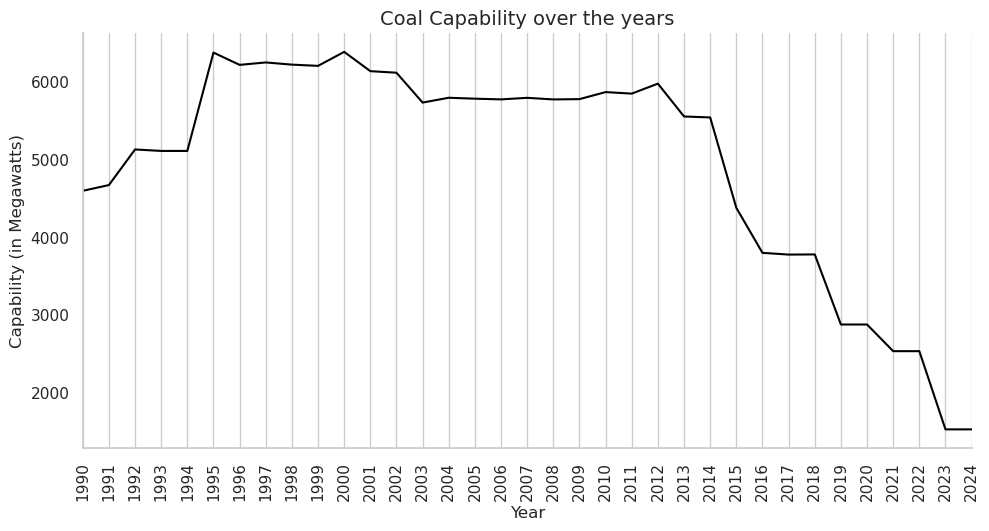

In [145]:
coal_data = data[(data['producertypeid'] == "TOT") & (data['energysourceid'] == 'COL')]

#make line plot of coal 
sns.relplot(coal_data, kind = 'line', x = 'period', y = 'capability', aspect = 2, color = "black")

# plot styling 
plt.title("Coal Capability over the years", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Capability (in Megawatts)")
plt.xticks(coal_data['period'], rotation = 90)
plt.grid(axis='y')
plt.margins(x=0)

From this line graph, we can see that coal capability has been declining since 2012. We can assume that VA has found better resources to produce energy, such as switching to renewables or more efficient fossil fuels, like natural gas. 

**Now for Nuclear**

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


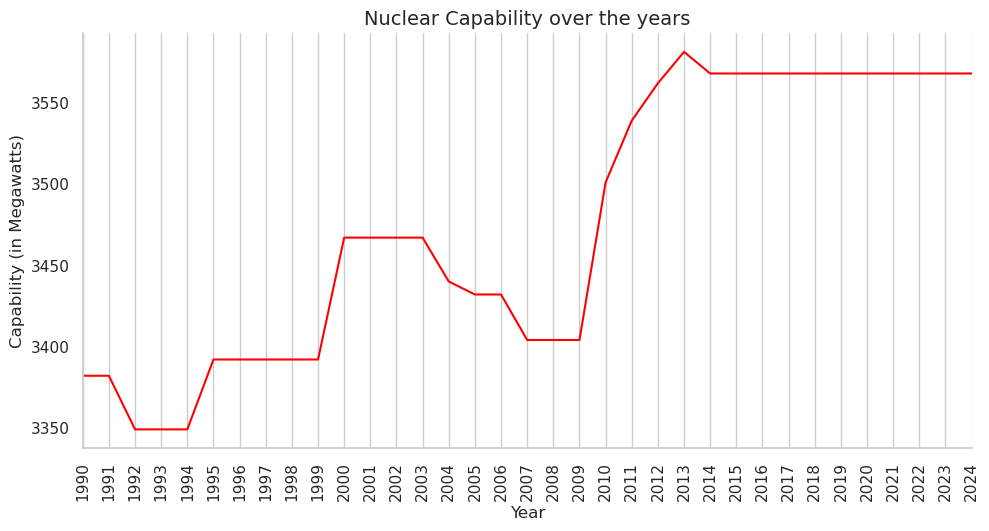

In [146]:
nuclear_data = data[(data['producertypeid'] == "TOT") & (data['energysourceid'] == 'NUC')]

#make line plot of nuclear
sns.relplot(nuclear_data, kind = 'line', x = 'period', y = 'capability', aspect = 2, color = "red")

# plot styling 
plt.title("Nuclear Capability over the years", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Capability (in Megawatts)")
plt.xticks(coal_data['period'], rotation = 90)
plt.grid(axis='y')
plt.margins(x=0)

This is an interesting line graph because there are many flat lines, indicating zero growth in nuclear capability in VA. This shows that we are moving to newer sources beyond nuclear that produce biohazardous waste. 

**Now Solar** 

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


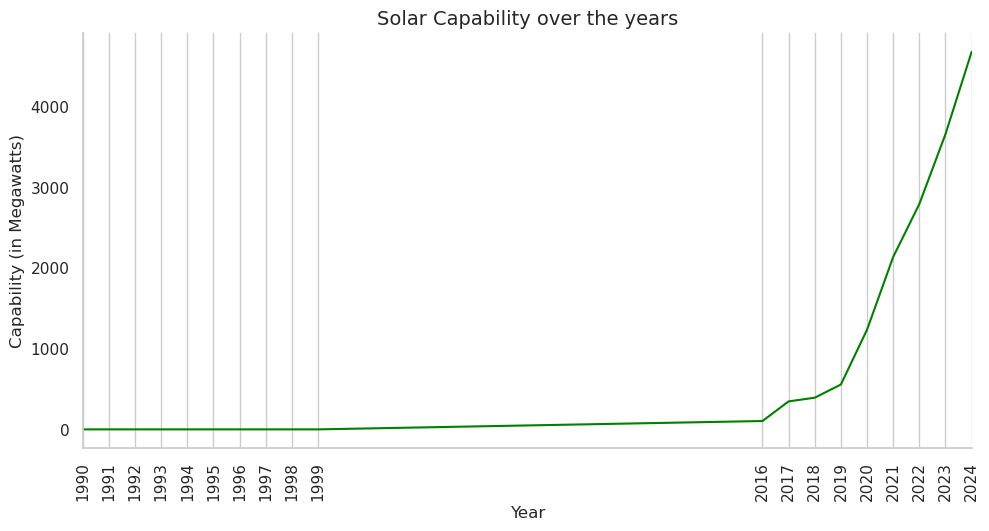

In [147]:
solar_data = data[(data['producertypeid'] == "TOT") & (data['energysourceid'] == 'SOL')]

#make line plot of solar
sns.relplot(solar_data, kind = 'line', x = 'period', y = 'capability', aspect = 2, color = "green")

# plot styling 
plt.title("Solar Capability over the years", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Capability (in Megawatts)")
plt.xticks(solar_data['period'], rotation = 90)
plt.grid(axis='y')
plt.margins(x=0)

From this line graph, we can see solar has had lots of growth after 2016, but before that, VA had very little if any capability in solar production 

**Now Petroleum**

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


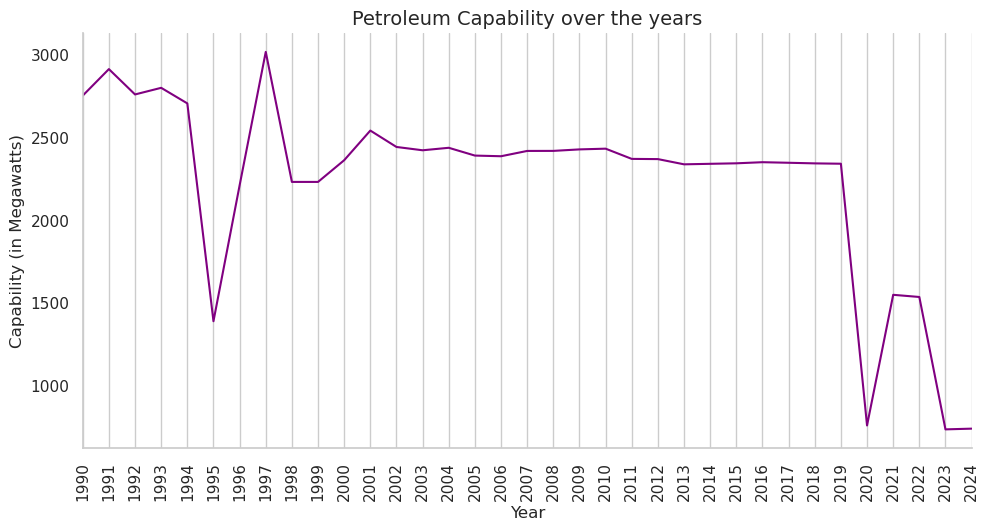

In [148]:
pet_data = data[(data['producertypeid'] == "TOT") & (data['energysourceid'] == 'PET')]

#make line plot of coal 
sns.relplot(pet_data, kind = 'line', x = 'period', y = 'capability', aspect = 2, color = "purple")

# plot styling 
plt.title("Petroleum Capability over the years", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Capability (in Megawatts)")
plt.xticks(pet_data['period'], rotation = 90)
plt.grid(axis='y')
plt.margins(x=0)

This is interesting. We see that petroleum capability was rocky from 1994 to 1998, but after that, it remained stable for 20 years, and in 2019, capability dropped significantly. 

**Top 5 Energy Sources Over time**

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


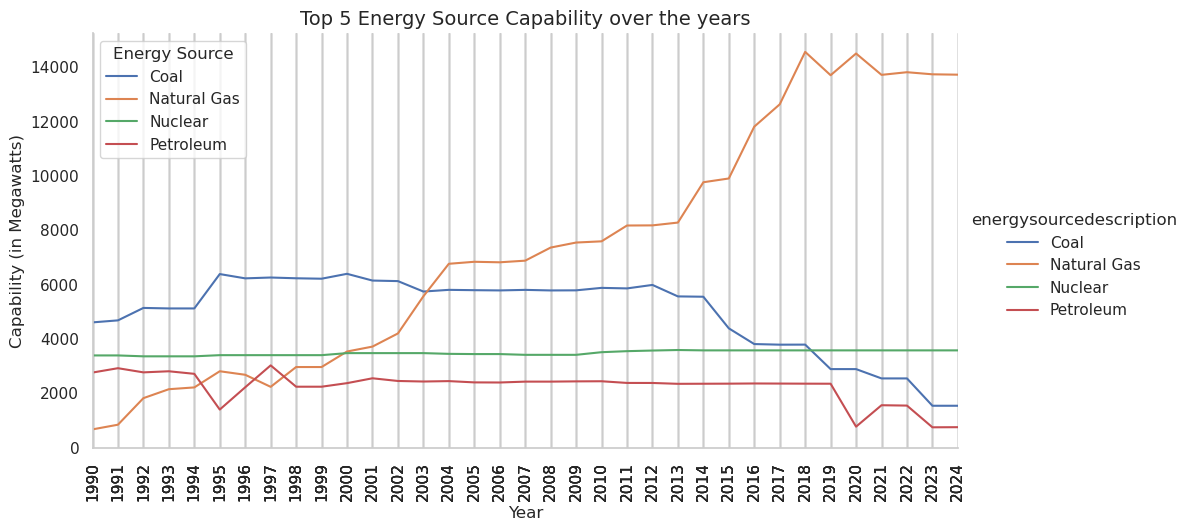

In [149]:
mask = ['NG','COL','PET','NUC','SPS']
t5_data = data[(data['producertypeid'] == "TOT") & (data['energysourceid'].isin(mask))]

sns.relplot(t5_data, kind = 'line', x = 'period', y = 'capability', hue='energysourcedescription', aspect = 2, color = "purple")


plt.title("Top 5 Energy Source Capability over the years", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Capability (in Megawatts)")
plt.xticks(t5_data['period'], rotation = 90)
plt.grid(axis='y')
plt.legend(title = 'Energy Source')
plt.margins(x=0)


# **---------------------------- Energy capability Heatmap  ---------------------------**


In [150]:
## We can use the energy source pivot table made above
# we normalize based on axis 0 (Period)
energy_pivot.style.background_gradient(cmap='viridis_r', axis=1)

energysourcedescription,Battery,Coal,Hydroelectric,Natural Gas,Nuclear,Other,Other Biomass,Petroleum,Petroleum - ST,Pumped Storage,Solar,Wind,Wood
period,,,,,,,,,,,,,
1990,0.000000,4598.000000,778.000000,661.000000,3382.000000,62.000000,147.000000,2752.000000,0.000000,2345.000000,0.000000,0.000000,340.000000
1991,0.000000,4672.000000,782.000000,833.000000,3382.000000,62.000000,150.000000,2912.000000,0.000000,2345.000000,0.000000,0.000000,349.000000
1992,0.000000,5130.000000,781.000000,1810.000000,3349.000000,257.000000,153.000000,2759.000000,0.000000,2345.000000,0.000000,0.000000,349.000000
1993,0.000000,5111.000000,787.000000,2139.000000,3349.000000,0.000000,159.000000,2799.000000,0.000000,2345.000000,0.000000,0.000000,349.000000
1994,0.000000,5111.000000,786.000000,2205.000000,3349.000000,0.000000,163.000000,2705.000000,0.000000,2345.000000,0.000000,0.000000,433.000000
1995,0.000000,6376.000000,763.000000,2800.000000,3392.000000,0.000000,163.000000,1390.000000,0.000000,2345.000000,0.000000,0.000000,399.000000
1996,0.000000,6218.000000,762.000000,2670.000000,3392.000000,129.000000,218.000000,2210.000000,0.000000,2345.000000,0.000000,0.000000,429.000000
1997,0.000000,6249.000000,761.000000,2226.000000,3392.000000,129.000000,218.000000,3016.000000,0.000000,2345.000000,0.000000,0.000000,396.000000
1998,0.000000,6221.000000,764.000000,2955.000000,3392.000000,206.000000,212.000000,2231.000000,0.000000,2345.000000,0.000000,0.000000,424.000000


In [151]:
# we can also normalize based on axis 1 (Energy Source)
energy_pivot.style.background_gradient(cmap='viridis_r', axis=0)

energysourcedescription,Battery,Coal,Hydroelectric,Natural Gas,Nuclear,Other,Other Biomass,Petroleum,Petroleum - ST,Pumped Storage,Solar,Wind,Wood
period,,,,,,,,,,,,,
1990,0.000000,4598.000000,778.000000,661.000000,3382.000000,62.000000,147.000000,2752.000000,0.000000,2345.000000,0.000000,0.000000,340.000000
1991,0.000000,4672.000000,782.000000,833.000000,3382.000000,62.000000,150.000000,2912.000000,0.000000,2345.000000,0.000000,0.000000,349.000000
1992,0.000000,5130.000000,781.000000,1810.000000,3349.000000,257.000000,153.000000,2759.000000,0.000000,2345.000000,0.000000,0.000000,349.000000
1993,0.000000,5111.000000,787.000000,2139.000000,3349.000000,0.000000,159.000000,2799.000000,0.000000,2345.000000,0.000000,0.000000,349.000000
1994,0.000000,5111.000000,786.000000,2205.000000,3349.000000,0.000000,163.000000,2705.000000,0.000000,2345.000000,0.000000,0.000000,433.000000
1995,0.000000,6376.000000,763.000000,2800.000000,3392.000000,0.000000,163.000000,1390.000000,0.000000,2345.000000,0.000000,0.000000,399.000000
1996,0.000000,6218.000000,762.000000,2670.000000,3392.000000,129.000000,218.000000,2210.000000,0.000000,2345.000000,0.000000,0.000000,429.000000
1997,0.000000,6249.000000,761.000000,2226.000000,3392.000000,129.000000,218.000000,3016.000000,0.000000,2345.000000,0.000000,0.000000,396.000000
1998,0.000000,6221.000000,764.000000,2955.000000,3392.000000,206.000000,212.000000,2231.000000,0.000000,2345.000000,0.000000,0.000000,424.000000


# Some pie Charts

Text(0.5, 1.0, 'Virginia Total Capability by Energy Source (2024)')

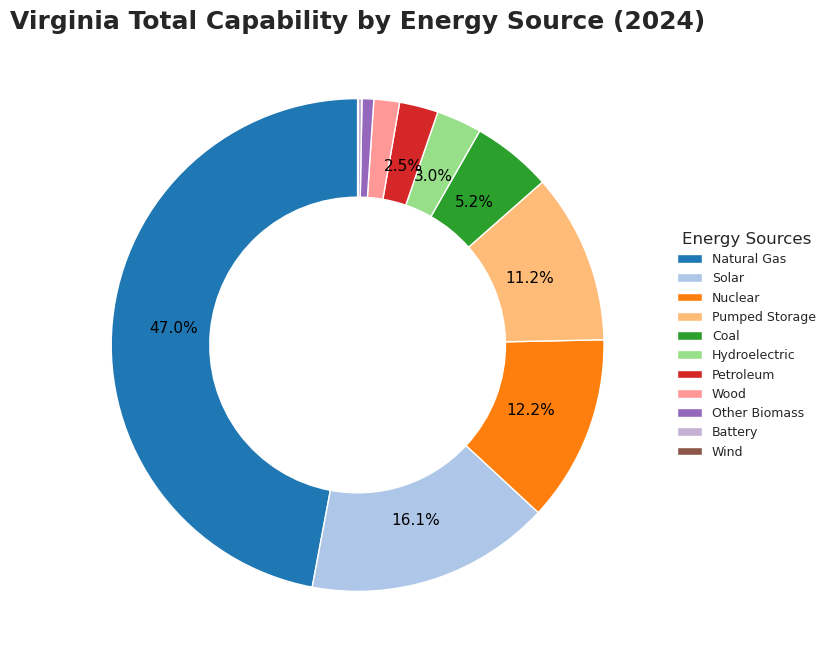

In [155]:

mask = ['Battery','Coal','Pumped Storage','Hydroelectric','Natural Gas','Nuclear','Other Biomass','Petroleum','Solar','Wind','Wood','Other']
pie_data = data[(data['producertypeid'] == 'TOT') & (data['period'] == 2024) & (data['energysourcedescription'].isin(mask))]

# Aggregate capability
pie_summary = (pie_data.groupby("energysourcedescription")["capability"].sum().sort_values(ascending=False))

# choose colors
colors = sns.color_palette("tab20", n_colors=len(pie_summary))

# Only show % label if ≥ 2.4%
def autopct_threshold(pct):
    return f'{pct:.1f}%' if pct >= 2.4 else ''

plt.figure(figsize=(10, 8))

# Pie without labels on slices
patches, texts, autotexts = plt.pie(pie_summary,labels=None, autopct=autopct_threshold, startangle=90, colors=colors, wedgeprops=dict(width=0.40, edgecolor='white'), pctdistance=0.75)

# Shrink the donut hole a bit
centre_circle = plt.Circle((0, 0), 0.28, fc='white')
plt.gca().add_artist(centre_circle)

# Format % labels
for text in autotexts:
    text.set_fontsize(11)
    text.set_color("black")

# Add legend 
plt.legend(patches,pie_summary.index,loc="center left",bbox_to_anchor=(1, 0.5),title="Energy Sources",frameon=False,fontsize=9)

plt.title("Virginia Total Capability by Energy Source (2024)", fontsize=18, weight='bold')